<a href="https://colab.research.google.com/github/Walls182/API_ADOPTAPATAS_3/blob/master/Linear_regression_Com.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Universidad de Cundinamarca, machine learning
#Karen Dayana Duarte Fandiño
#Walter Alejandro Salazar


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
uploaded = files.upload()
for filename in uploaded.keys():
  dataset = pd.read_csv(filename)


Saving precios portatiles.csv to precios portatiles (2).csv


In [ ]:
print("Primeras Filas")
print(dataset.head())

Primeras Filas
  Fabricante     Producto     Modelo  Pulgadas  \
0      Apple  MacBook Pro  Ultrabook      13.3   
1      Apple  Macbook Air  Ultrabook      13.3   
2         HP       250 G6   Notebook      15.6   
3      Apple  MacBook Pro  Ultrabook      15.4   
4      Apple  MacBook Pro  Ultrabook      13.3   

                           resolucion    CPU       Tipo_CPU  Frecuencia (GHz)  \
0  IPS Panel Retina Display 2560x1600  Intel        Core i5               2.3   
1                            1440x900  Intel        Core i5               1.8   
2                   Full HD 1920x1080  Intel  Core i5 7200U               2.5   
3  IPS Panel Retina Display 2880x1800  Intel        Core i7               2.7   
4  IPS Panel Retina Display 2560x1600  Intel        Core i5               3.1   

   RAM (GB)            Dico duro GPU_fabricante                GPU_Tipo  \
0         8            128GB SSD          Intel  Iris Plus Graphics 640   
1         8  128GB Flash Storage          Intel

In [ ]:
X = dataset [['RAM (GB)', 'Frecuencia (GHz)', 'precio (Euro)']]
y = dataset ['peso (kg)']

In [ ]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
def linear_regression(X_train, y_train):
  X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
  theta = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train
  return theta

In [ ]:
theta = linear_regression(X_train, y_train)
intercepto = theta[0]
coeficientes = theta[1:]

In [ ]:
def predict (X_test, theta):
  X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
  y_pred = X_test_b @ theta
  return y_pred

y_pred = predict (X_test, theta)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Evaluacion del modelo")
print("Coeficientes:", coeficientes)
print("Intercepcion (bias):", intercepto)
print("Error Medio Cuadratico (MSE):", mse)
print("Coeficiente de Determinacion (R^2):", r2)

Evaluacion del modelo
Coeficientes: [ 0.28510506  0.17648003 -0.1658859 ]
Intercepcion (bias): 2.0363653458877264
Error Medio Cuadratico (MSE): 0.3569913437444962
Coeficiente de Determinacion (R^2): 0.28509068171791885


Text(0.5, 1.0, 'Valores Reales vs Predicciones')

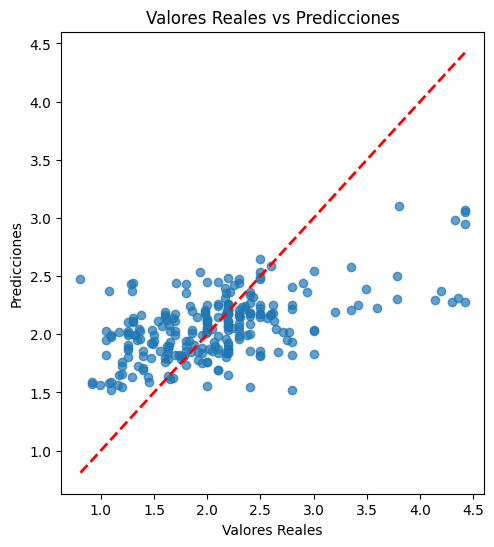

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Valores Reales vs Predicciones")

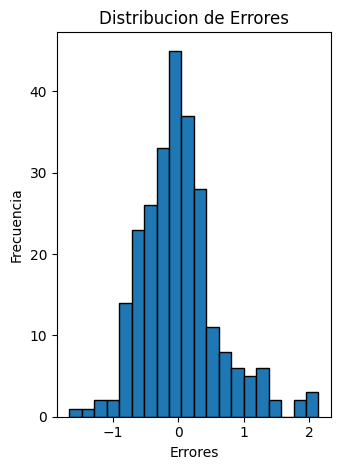

In [ ]:
errores = y_test - y_pred
plt.subplot(1, 2, 2)
plt.hist(errores, bins=20, edgecolor='black')
plt.xlabel("Errores")
plt.ylabel("Frecuencia")
plt.title("Distribucion de Errores")

plt.tight_layout()
plt.show()



In [ ]:
ram = float(input("Ingrese la cantidad de RAM (GB): "))
frecuencia = float(input("Ingrese la frecuencia (GHz): "))
precio = float(input("Ingrese el precio (Euro): "))

valores_especificos = np.array([[ram, frecuencia, precio]])
valores_especificados_normalizados = scaler.transform(valores_especificos)
valores_especificos_b = np.c_[np.ones((valores_especificados_normalizados.shape[0], 1)), valores_especificados_normalizados]
peso_predicho = valores_especificos_b @ theta

print("Peso estimado:", peso_predicho[0])

Ingrese la cantidad de RAM (GB): 8
Ingrese la frecuencia (GHz): 2.5
Ingrese el precio (Euro): 1500
Peso estimado: 1.9942942974113125


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
